/var/folders/h4/p09_wj3s5mq5flnvtryx9hw80000gn/T/ipykernel_67568/262456712.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = count.index, y = count.values, palette="bright")
/var/folders/h4/p09_wj3s5mq5flnvtryx9hw80000gn/T/ipykernel_67568/262456712.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i//5, i%5], x='class', y=column, data=df, palette="bright")
/var/folders/h4/p09_wj3s5mq5flnvtryx9hw80000gn/T/ipykernel_67568/262456712.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i//5, i%5], x='class', y=column, d

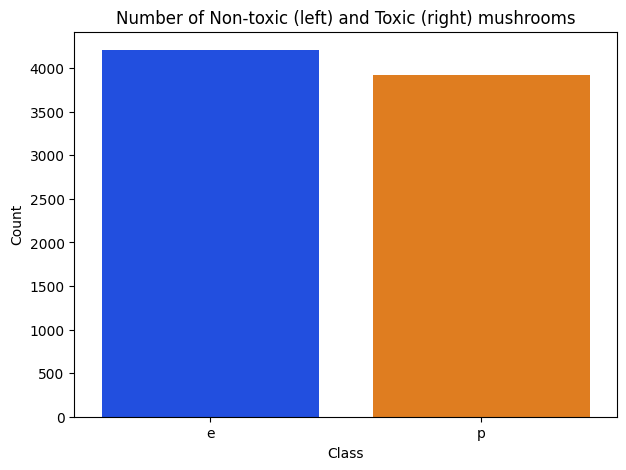

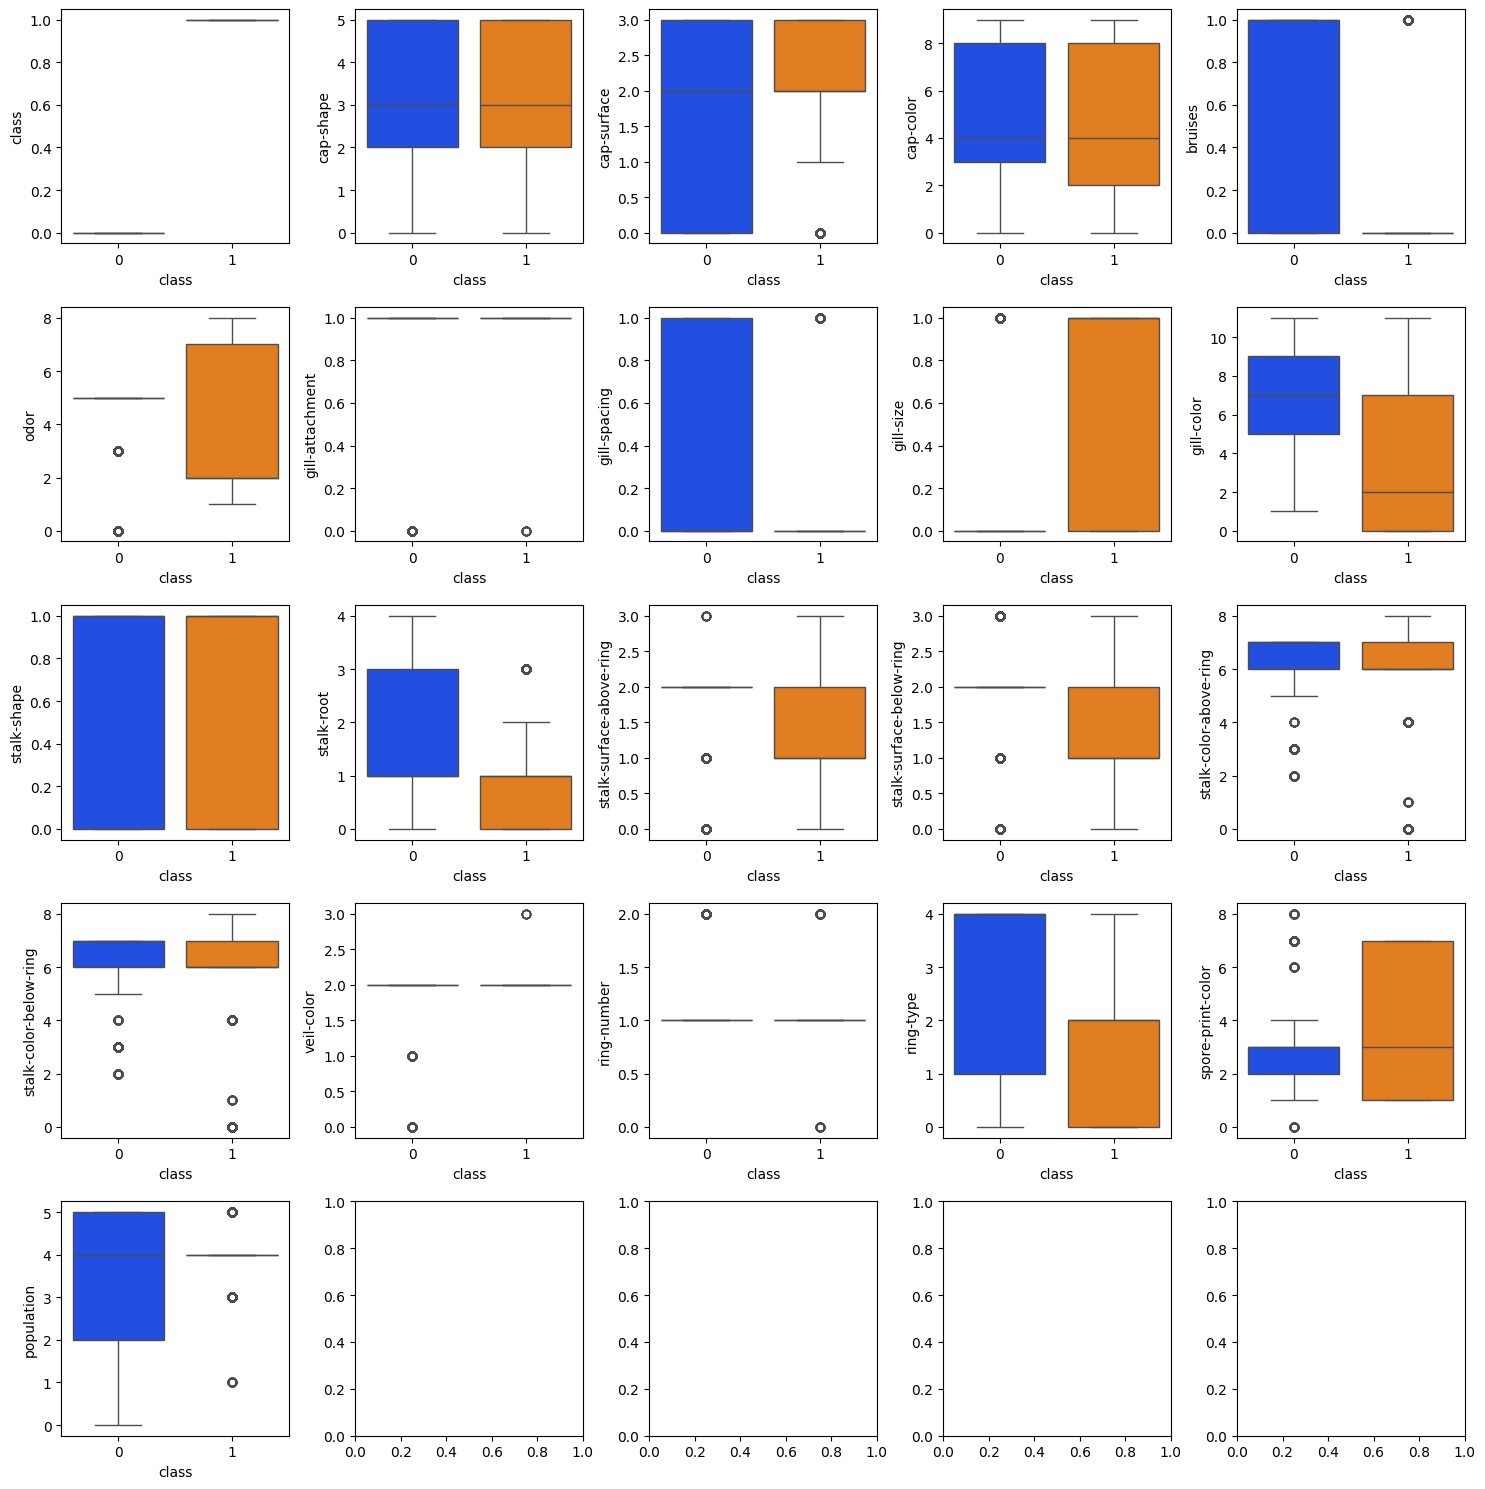

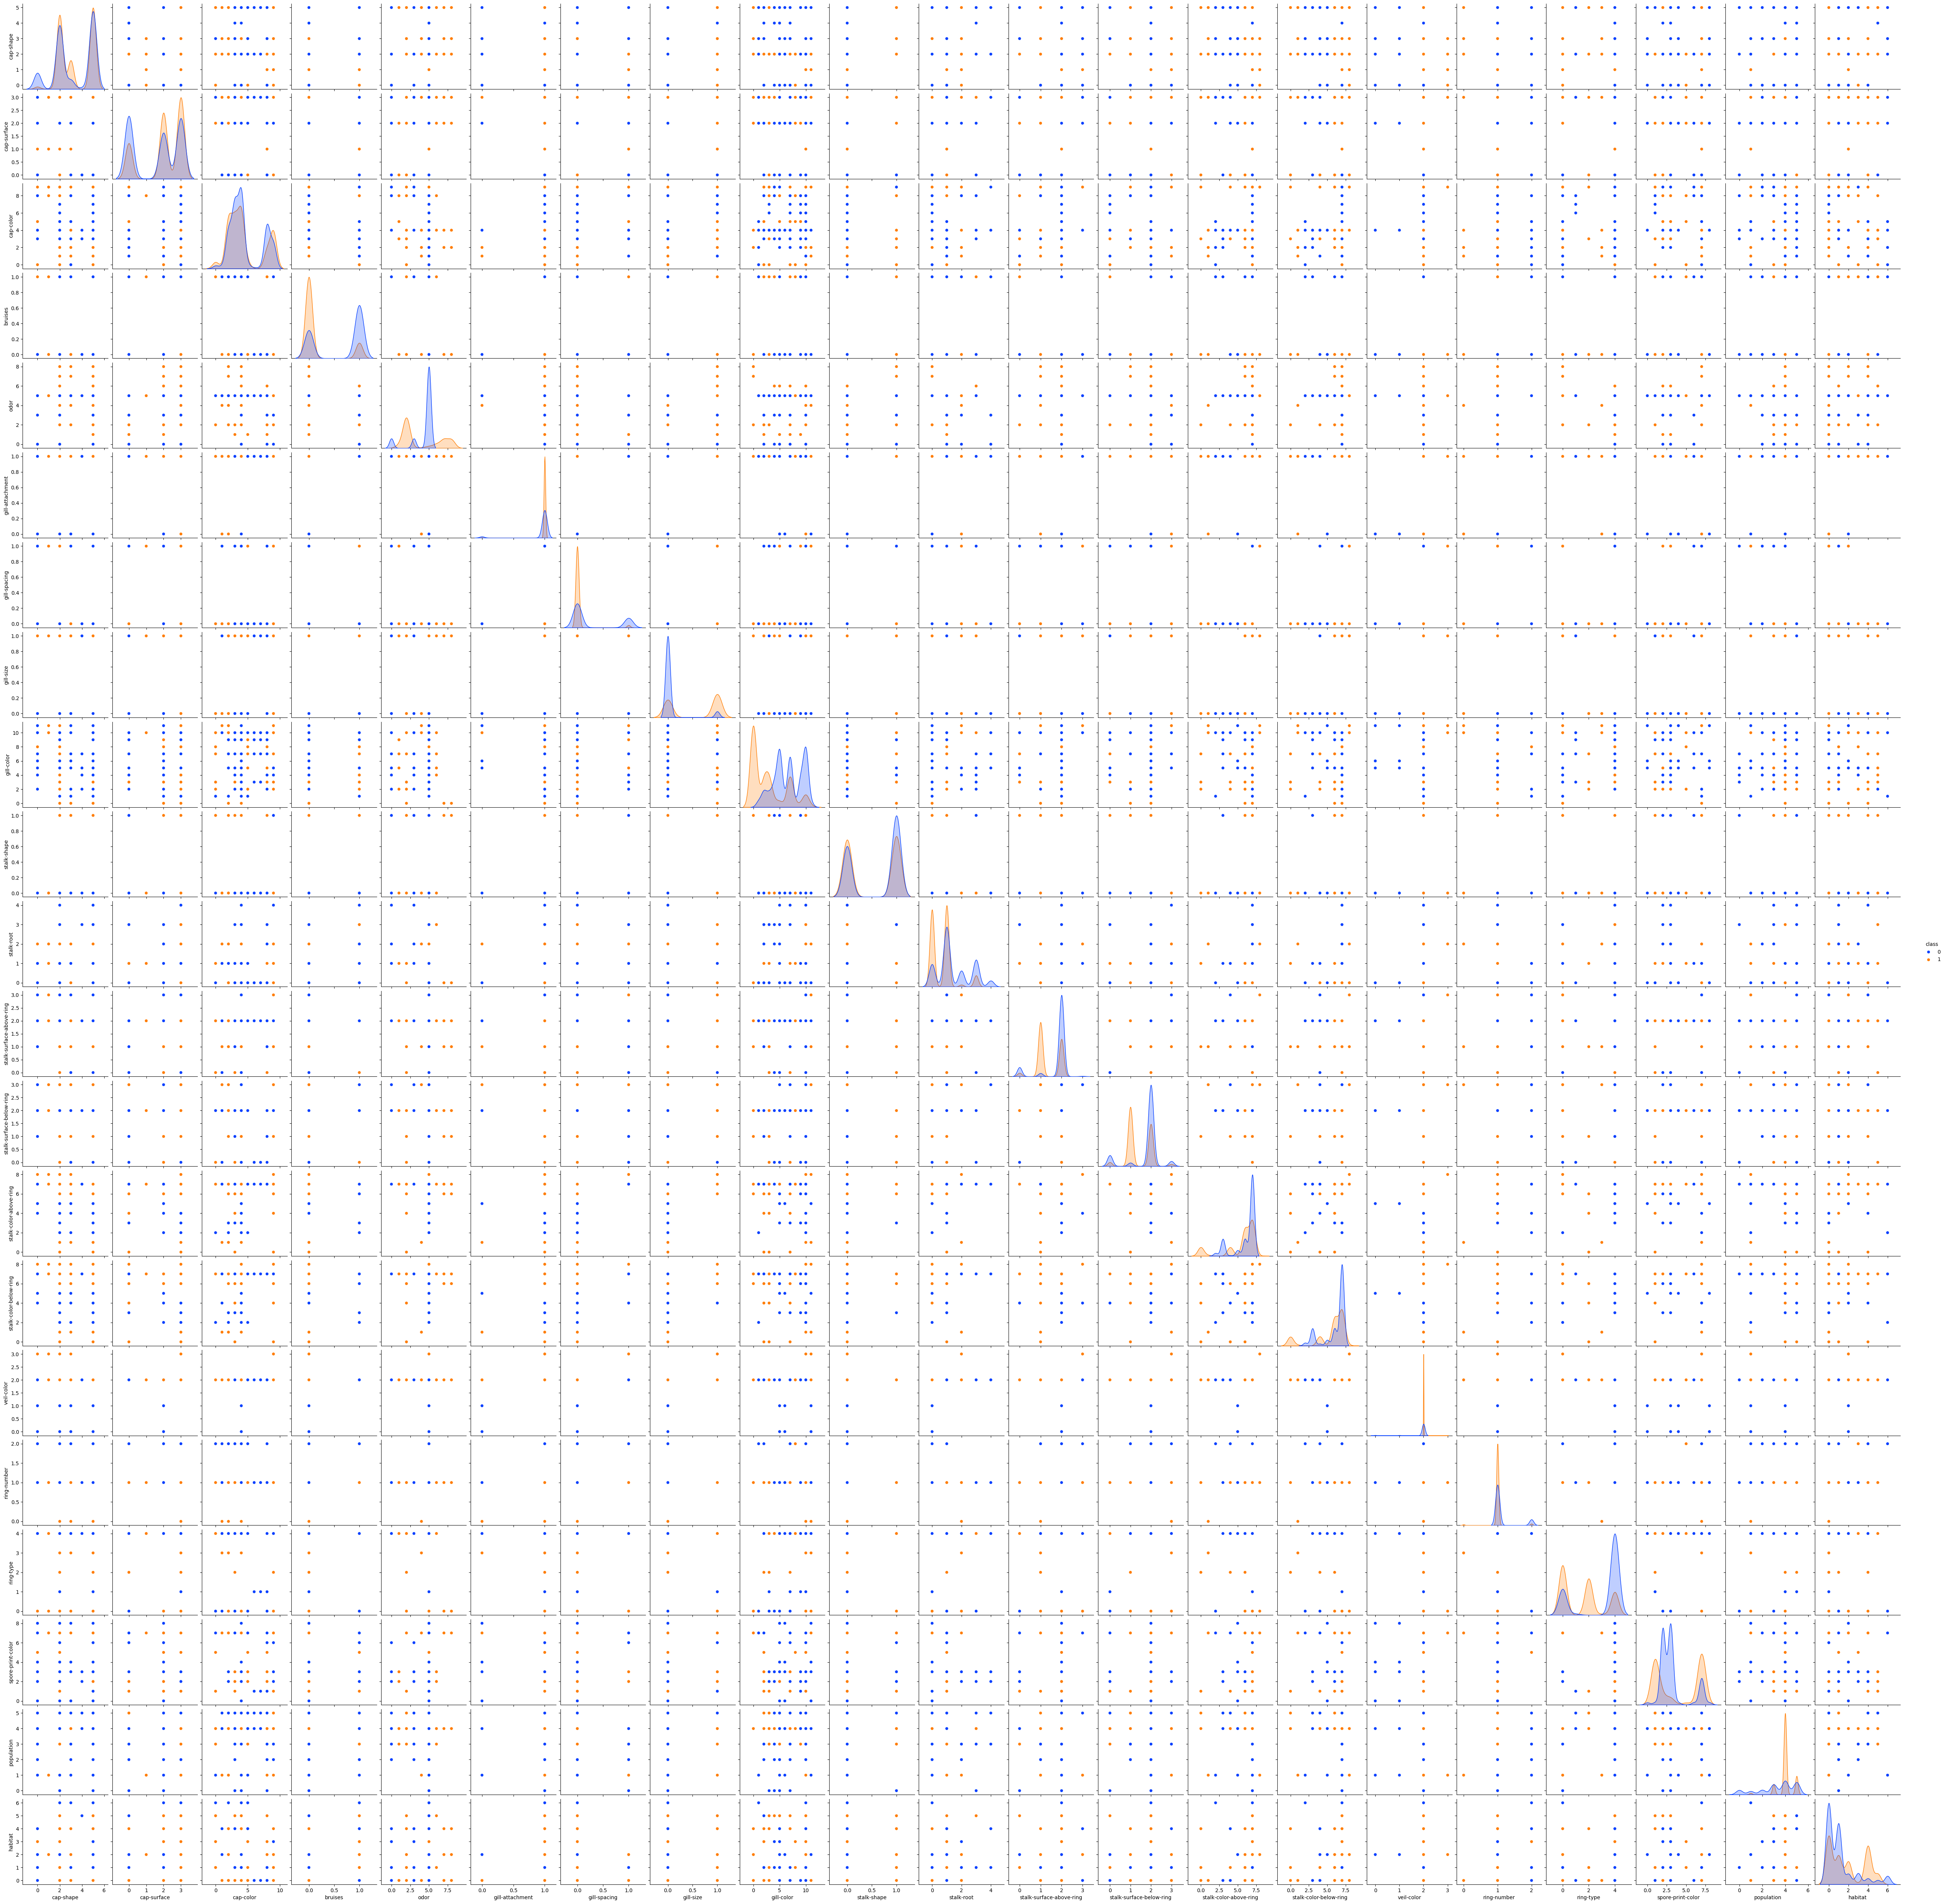

/var/folders/h4/p09_wj3s5mq5flnvtryx9hw80000gn/T/ipykernel_67568/262456712.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));


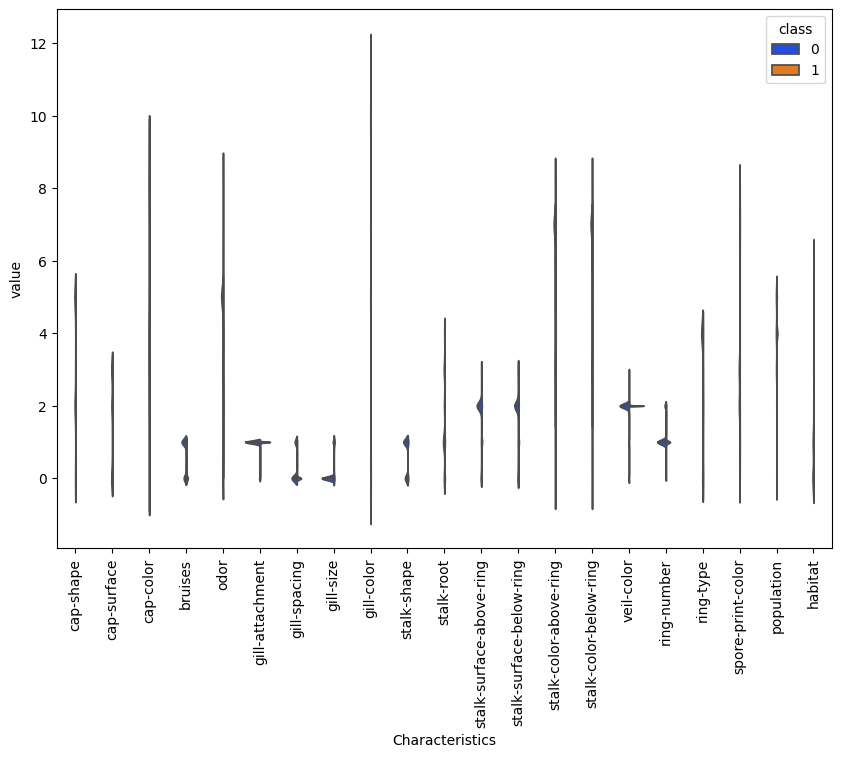

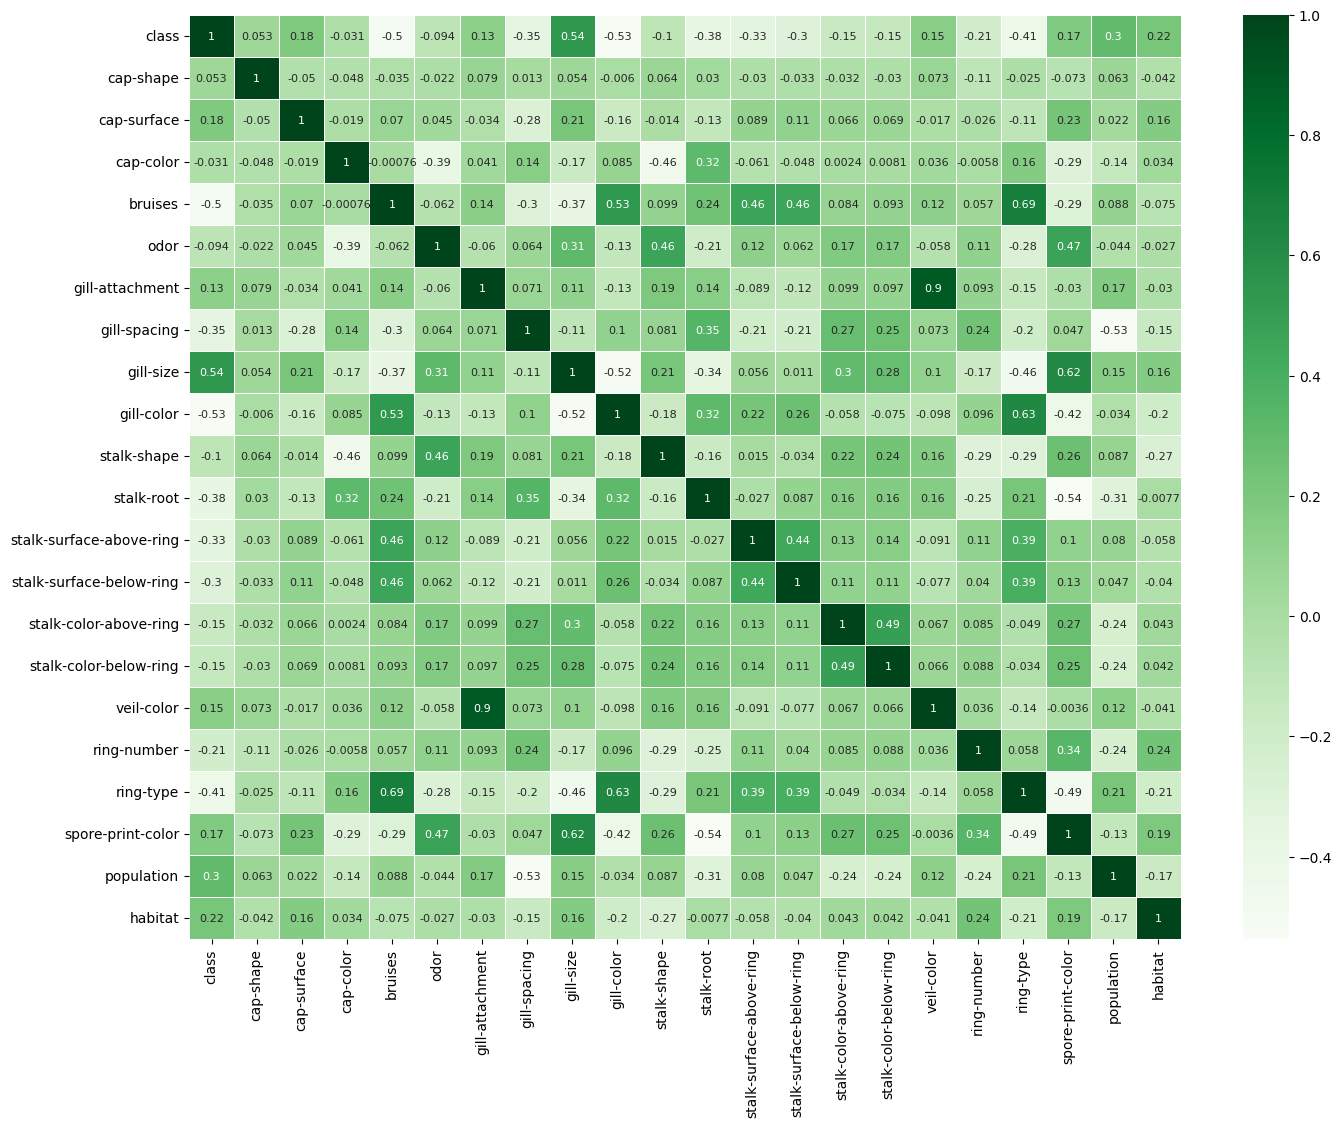

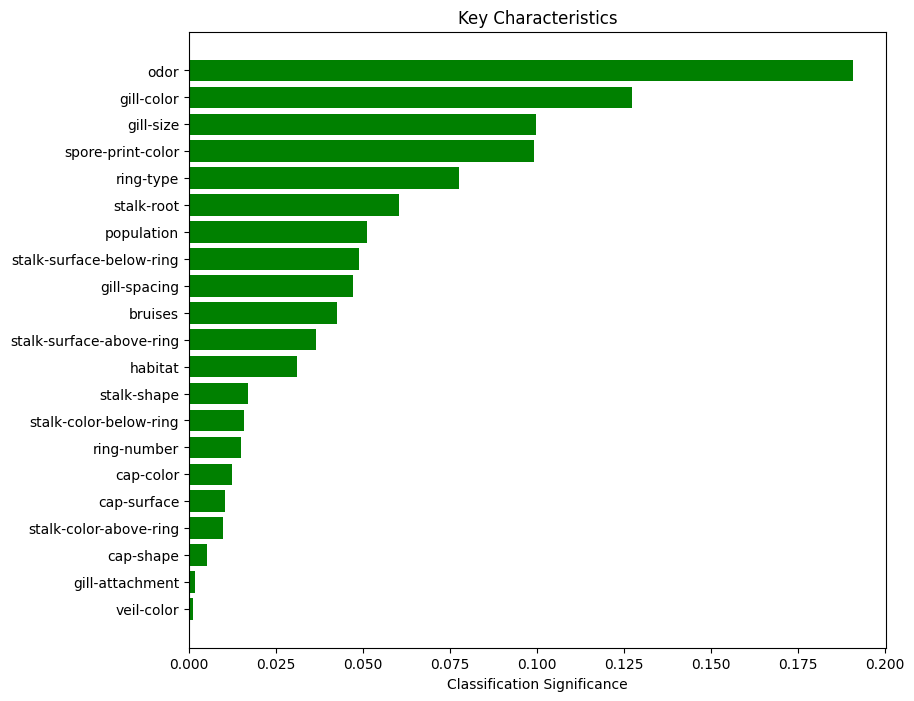

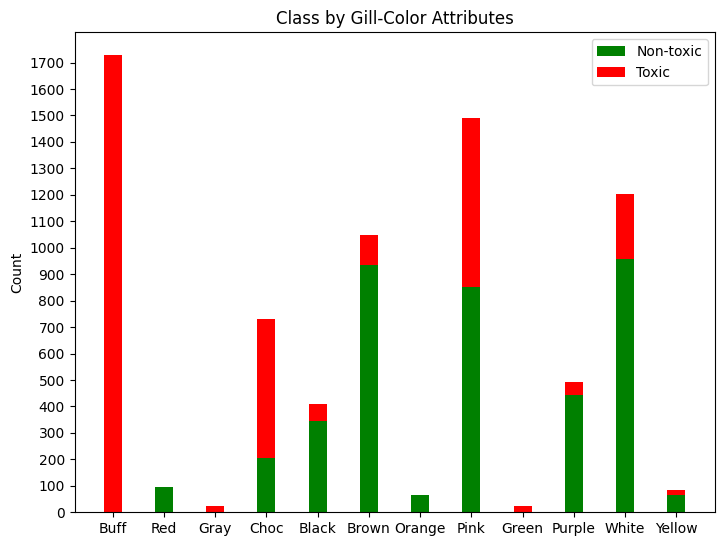

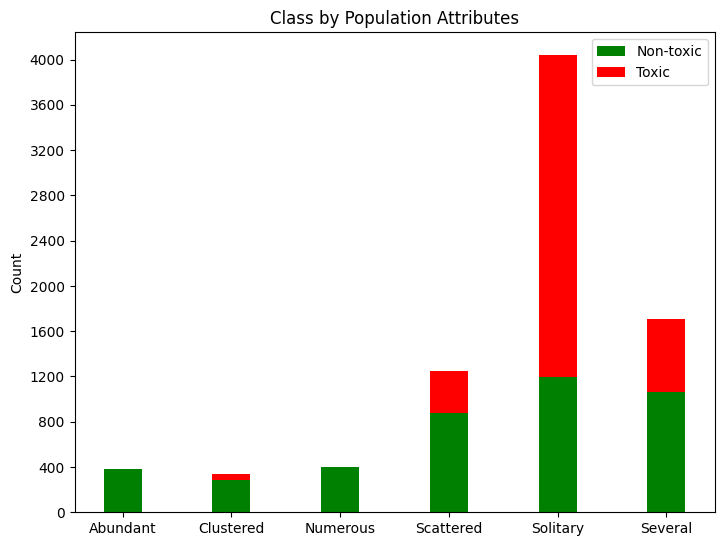

KeyError: "['spore-color'] not in index"

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  

df = pd.read_csv('static/fungi.csv')
df = df.drop(["veil-type"],axis=1)

# Classification report for prediction 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# BAR GRAPH count of Non-toxic/Toxic 
count = df['class'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x = count.index, y = count.values, palette="bright")
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Number of Non-toxic (left) and Toxic (right) mushrooms')

# Converting the data to ordinal 
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])    
    
# BOX PLOT 
fig, axes = plt.subplots(5, 5, figsize=(15,15))
for i, column in enumerate(df.columns[:-1]):
    sns.boxplot(ax=axes[i//5, i%5], x='class', y=column, data=df, palette="bright")
plt.tight_layout()

# PAIR PLOT
sns.pairplot(df, hue='class', palette='bright')
plt.show()

# VIOLIN PLOT 
# Stack columns --> 8124 x 22 becomes 170604 x 3 columns (class, attribute, value)
df_div = pd.melt(df, 'class', var_name='Characteristics')
fig, ax = plt.subplots(figsize=(10,7))
p = sns.violinplot(ax = ax, x='Characteristics', y='value', hue='class', split = True, data=df_div, inner = 'quartile', palette = 'bright')
df_no_class = df.drop(['class'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

# HEAT MAP
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 8}, linewidths=.5,cmap="Greens")
plt.savefig("fig3.png", format='png', dpi=500, bbox_inches='tight')
df_div = pd.melt(
    df, 'class', var_name='Characteristics')
X = df.drop(['class'], axis=1)
Y = df["class"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=45, test_size=0.5)

# Machine Learning Method 
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

# CLASSIFICATION SIGNIFICANCE BAR GRAPH
features_list = X.columns.values
FI = RFC.feature_importances_
sorted_idx = np.argsort(FI) 
plt.figure(figsize=(9,8))
plt.barh(range(len(sorted_idx)), FI[sorted_idx], color ="green")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Classification Significance')
plt.title('Key Characteristics')
plt.draw()
plt.show()


# GILL COLOR BAR PLOT
N = 12
df = pd.read_csv("static/fungi.csv") # Initiating data frame 
kc = df[['class', 'gill-color']]
# Buff
BP = len(kc.loc[(kc['gill-color'] == 'b') & (kc['class'] == 'p')])
BE = len(kc.loc[(kc['gill-color'] == 'b') & (kc['class'] == 'e')])
# Red
EP = len(kc.loc[(kc['gill-color'] == 'e') & (kc['class'] == 'p')])
EE = len(kc.loc[(kc['gill-color'] == 'e') & (kc['class'] == 'e')])
# Gray
GP = len(kc.loc[(kc['gill-color'] == 'g') & (kc['class'] == 'p')])
GE = len(kc.loc[(kc['gill-color'] == 'g') & (kc['class'] == 'e')])
# Chocolate
HP = len(kc.loc[(kc['gill-color'] == 'h') & (kc['class'] == 'p')])
HE = len(kc.loc[(kc['gill-color'] == 'h') & (kc['class'] == 'e')])
# Black
KP = len(kc.loc[(kc['gill-color'] == 'k') & (kc['class'] == 'p')])
KE = len(kc.loc[(kc['gill-color'] == 'k') & (kc['class'] == 'e')])
# Brown
NP = len(kc.loc[(kc['gill-color'] == 'n') & (kc['class'] == 'p')])
NE = len(kc.loc[(kc['gill-color'] == 'n') & (kc['class'] == 'e')])
# Orange
OP = len(kc.loc[(kc['gill-color'] == 'o') & (kc['class'] == 'p')])
OE = len(kc.loc[(kc['gill-color'] == 'o') & (kc['class'] == 'e')])
# Pink
PP = len(kc.loc[(kc['gill-color'] == 'p') & (kc['class'] == 'p')])
PE = len(kc.loc[(kc['gill-color'] == 'p') & (kc['class'] == 'e')])
# Green
GP = len(kc.loc[(kc['gill-color'] == 'r') & (kc['class'] == 'p')])
GE = len(kc.loc[(kc['gill-color'] == 'r') & (kc['class'] == 'e')])
# Purple
UP = len(kc.loc[(kc['gill-color'] == 'u') & (kc['class'] == 'p')])
UE = len(kc.loc[(kc['gill-color'] == 'u') & (kc['class'] == 'e')])
# White
WP = len(kc.loc[(kc['gill-color'] == 'w') & (kc['class'] == 'p')])
WE = len(kc.loc[(kc['gill-color'] == 'w') & (kc['class'] == 'e')])
# Yellow
YP = len(kc.loc[(kc['gill-color'] == 'y') & (kc['class'] == 'p')])
YE = len(kc.loc[(kc['gill-color'] == 'y') & (kc['class'] == 'e')])
non_toxic = (BE, EE, GE, HE, KE, NE, OE, PE, GE, UE, WE, YE)
Toxic = (BP, EP, GP, HP, KP, NP, OP, PP, GP, UP, WP, YP)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, non_toxic, width, color='g')
ax.bar(ind, Toxic, width, bottom=non_toxic, color='r')
ax.set_ylabel('Count')
ax.set_title('Class by Gill-Color Attributes')
ax.set_xticks(ind)
ax.set_xticklabels(('Buff', 'Red', 'Gray', 'Choc', 'Black', 'Brown', 'Orange', 'Pink', 'Green', 'Purple', 'White', 'Yellow'))
ax.set_yticks(np.arange(0, 1800, 100))
ax.legend(labels=['Non-toxic', 'Toxic'])
plt.show()

# POPULATION BAR PLOT 
N = 6
kc = df[['class', 'population']]
# Buff
BP = len(kc.loc[(kc['population'] == 'a') & (kc['class'] == 'p')])
BE = len(kc.loc[(kc['population'] == 'a') & (kc['class'] == 'e')])
# Red
EP = len(kc.loc[(kc['population'] == 'c') & (kc['class'] == 'p')])
EE = len(kc.loc[(kc['population'] == 'c') & (kc['class'] == 'e')])
# Gray
GP = len(kc.loc[(kc['population'] == 'n') & (kc['class'] == 'p')])
GE = len(kc.loc[(kc['population'] == 'n') & (kc['class'] == 'e')])
# Chocolate
HP = len(kc.loc[(kc['population'] == 's') & (kc['class'] == 'p')])
HE = len(kc.loc[(kc['population'] == 's') & (kc['class'] == 'e')])
# Black
KP = len(kc.loc[(kc['population'] == 'v') & (kc['class'] == 'p')])
KE = len(kc.loc[(kc['population'] == 'v') & (kc['class'] == 'e')])
# Brown
NP = len(kc.loc[(kc['population'] == 'y') & (kc['class'] == 'p')])
NE = len(kc.loc[(kc['population'] == 'y') & (kc['class'] == 'e')])
non_toxic = (BE, EE, GE, HE, KE, NE)
Toxic = (BP, EP, GP, HP, KP, NP)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, non_toxic, width, color='g')
ax.bar(ind, Toxic, width, bottom=non_toxic, color='r')
ax.set_ylabel('Count')
ax.set_title('Class by Population Attributes')
ax.set_xticks(ind)
ax.set_xticklabels(('Abundant', 'Clustered', 'Numerous', 'Scattered', 'Solitary', 'Several'))
ax.set_yticks(np.arange(0, 4200, 400))
ax.legend(labels=['Non-toxic', 'Toxic'])
plt.show()

# SPORE PRINT COLOR BAR PLOT 
N = 9
kc = df[['class', 'spore-color']]
# Buff
BP = len(kc.loc[(kc['spore-color'] == 'b') & (kc['class'] == 'p')])
BE = len(kc.loc[(kc['spore-color'] == 'b') & (kc['class'] == 'e')])
# Chocolate
HP = len(kc.loc[(kc['spore-color'] == 'h') & (kc['class'] == 'p')])
HE = len(kc.loc[(kc['spore-color'] == 'h') & (kc['class'] == 'e')])
# Black
KP = len(kc.loc[(kc['spore-color'] == 'k') & (kc['class'] == 'p')])
KE = len(kc.loc[(kc['spore-color'] == 'k') & (kc['class'] == 'e')])
# Brown
NP = len(kc.loc[(kc['spore-color'] == 'n') & (kc['class'] == 'p')])
NE = len(kc.loc[(kc['spore-color'] == 'n') & (kc['class'] == 'e')])
# Orange
OP = len(kc.loc[(kc['spore-color'] == 'o') & (kc['class'] == 'p')])
OE = len(kc.loc[(kc['spore-color'] == 'o') & (kc['class'] == 'e')])
# Green
GP = len(kc.loc[(kc['spore-color'] == 'r') & (kc['class'] == 'p')])
GE = len(kc.loc[(kc['spore-color'] == 'r') & (kc['class'] == 'e')])
# Purple
UP = len(kc.loc[(kc['spore-color'] == 'u') & (kc['class'] == 'p')])
UE = len(kc.loc[(kc['spore-color'] == 'u') & (kc['class'] == 'e')])
# White
WP = len(kc.loc[(kc['spore-color'] == 'w') & (kc['class'] == 'p')])
WE = len(kc.loc[(kc['spore-color'] == 'w') & (kc['class'] == 'e')])
# Yellow
YP = len(kc.loc[(kc['spore-color'] == 'y') & (kc['class'] == 'p')])
YE = len(kc.loc[(kc['spore-color'] == 'y') & (kc['class'] == 'e')])
non_toxic = (BE, HE, KE, NE, OE, GE, UE, WE, YE)
Toxic = (BP, HP, KP, NP, OP, GP, UP, WP, YP)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, non_toxic, width, color='g')
ax.bar(ind, Toxic, width, bottom=non_toxic, color='r')
ax.set_ylabel('Count')
ax.set_title('Class by Spore Print Color Attributes')
ax.set_xticks(ind)
ax.set_xticklabels(('Buff', 'Chocolate', 'Black', 'Brown', 'Orange', 'Green', 'Purple', 'White', 'Yellow'))
ax.set_yticks(np.arange(0, 3500, 500))
ax.legend(labels=['Non-toxic', 'Toxic'])
plt.show()